Objectives:

1. Quantify the count of dining establishments that offer reservation services for tables and evaluate how this amenity influences their overall ratings (rate).

2. Determine the number of restaurants that facilitate online ordering and scrutinize its impact on their rating scores (rate).

3. Explore the relationship between the average cost for a meal for two individuals (measured in INR) and the average customer review ranking (ave_review_ranking in the dataset) in relation to the overall restaurant ratings (rate).

4. Investigate the variations in ratings (rate) and the mean cost for two people across diverse restaurant categories.

5. Unearth additional insights pertaining to eateries, urban centers, and culinary preferences. This may encompass the identification of top-performing and underperforming dining establishments or ascertaining the city with the highest concentration of restaurants.

# Data Reading

In [1]:
import pandas as pd

# Load the FoodieBay dataset
data = pd.read_csv('FoodieBay.csv')

# Check the structure and datatype of the dataset 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [3]:
# Display the first 10 rows of the dataset to get a sense of the data
data.head(10)

url  \
0  https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1  https://www.zomato.com/bangalore/the-burger-pl...   
2  https://www.zomato.com/bangalore/millet-mama-b...   
3  https://www.zomato.com/bangalore/red-onion-sha...   
4  https://www.zomato.com/bangalore/chaiywaala-da...   
5  https://www.zomato.com/bangalore/alter-ego-dde...   
6  https://www.zomato.com/bangalore/banashankari-...   
7  https://www.zomato.com/bangalore/shanthi-sagar...   
8  https://www.zomato.com/bangalore/mahesh-friend...   
9  https://www.zomato.com/bangalore/sri-sai-bhava...   

                                             address  \
0  173/218, GF, Opposite Ranka Colony, Bannerghat...   
1  2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...   
2  Next To Surana College, South End Circle, Basa...   
3  Money Chambers Double Road, Shanti Nagar, Bang...   
4  Shop 67, 69, 70, Inside Ramaiah Campus, New BE...   
5  210, 5th A Cross Road, HRBR Layout 3rd Block, ...   
6     3B, 1st Main, Koramangala 7th Block, Bangalore   
7                  9/1, Tank Road, Ulsoor, Bangalore   
8  14/6, 9th Main Road, Opposite Water Tank, 100 ...   
9  714, C Block, 1st Main, 60 Feet Road, AECS Lay...   

                          name                             phone  \
0                     D2V Cafe  +91 9886986111\r\n+91 8550051111   
1             The Burger Place                    +91 9108974600   
2                  Millet Mama  +91 7411918648\r\n+91 9986975625   
3                    Red Onion                    +91 8867253669   
4          Chaiywaala Da Dhaba    +91 8217431260\n+91 7975991975   
5             Alter Ego D'Deli    080 48651581\r\n+91 9880459084   
6  Banashankari Donne Biriyani                    +91 7975339058   
7                Shanthi Sagar                      080 41135196   
8   Mahesh Friends Food Center                    +91 9731081364   
9               Sri Sai Bhavan                    +91 9066696999   

                location      rest_type  \
0      Bannerghatta Road           Cafe   
1  Koramangala 1st Block    Quick Bites   
2           Basavanagudi    Quick Bites   
3           Shanti Nagar  Casual Dining   
4           New BEL Road           Cafe   
5           Kalyan Nagar           Cafe   
6  Koramangala 7th Block    Quick Bites   
7                 Ulsoor    Quick Bites   
8                    BTM    Quick Bites   
9            Brookefield    Quick Bites   

                                            cuisines  \
0                                               Cafe   
1                     Burger, Continental, Fast Food   
2                         South Indian, Healthy Food   
3              Chinese, North Indian, Biryani, Kebab   
4                                          Cafe, Tea   
5  Cafe, Continental, Italian, Burger, Pizza, Sal...   
6                              South Indian, Biryani   
7        South Indian, North Indian, Chinese, Juices   
8                              Chinese, North Indian   
9                                       South Indian   

                                           menu_item listed_in_type  \
0                                                 []          Cafes   
1                                                 []       Dine-out   
2                                                 []       Delivery   
3  ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                 []       Dine-out   
5  ['Chicken Steak', 'Beef Steak', 'Pork Steak', ...          Cafes   
6                                                 []       Dine-out   
7                                                 []       Dine-out   
8                                                 []       Delivery   
9  ['2 Idli with 1 Vada', 'Poori', 'Plain Dosa', ...       Delivery   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No     

In [57]:
data.isnull().sum()

url                                  0
address                              0
name                                 0
phone                              884
rest_type                            0
                                  ... 
listed_in_city_Old Airport Road      0
listed_in_city_Rajajinagar           0
listed_in_city_Residency Road        0
listed_in_city_Sarjapur Road         0
listed_in_city_Whitefield            0
Length: 141, dtype: int64

# Data Exploration

In [4]:
# Step 1: Handling Missing Values
# Replace missing numerical values with the mean value of their respective columns
numeric_columns = ["ave_cost_for_two", "ave_review_ranking"]
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Replace missing categorical values in the "dish_liked" column with "Not specified"
data["dish_liked"].fillna("Not specified", inplace=True)

# Step 2: Converting Categorical Variables to Numerical Format (One-Hot Encoding)
# Create dummy variables for categorical columns: "location", "listed_in_type", "listed_in_city"
data = pd.get_dummies(data, columns=["location", "listed_in_type", "listed_in_city"], drop_first=True)

# Step 3: Ensuring Correct Data Types
# Ensure that data types of "ave_cost_for_two" and "ave_review_ranking" are correctly set to float
data["ave_cost_for_two"] = data["ave_cost_for_two"].astype(float)
data["ave_review_ranking"] = data["ave_review_ranking"].astype(float)

# Step 4: Cleaning and Preprocessing Other Features (not illustrated in this example)

# Display the preprocessed dataset
data.head()


url  \
0  https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1  https://www.zomato.com/bangalore/the-burger-pl...   
2  https://www.zomato.com/bangalore/millet-mama-b...   
3  https://www.zomato.com/bangalore/red-onion-sha...   
4  https://www.zomato.com/bangalore/chaiywaala-da...   

                                             address                 name  \
0  173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1  2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2  Next To Surana College, South End Circle, Basa...          Millet Mama   
3  Money Chambers Double Road, Shanti Nagar, Bang...            Red Onion   
4  Shop 67, 69, 70, Inside Ramaiah Campus, New BE...  Chaiywaala Da Dhaba   

                              phone      rest_type  \
0  +91 9886986111\r\n+91 8550051111           Cafe   
1                    +91 9108974600    Quick Bites   
2  +91 7411918648\r\n+91 9986975625    Quick Bites   
3                    +91 8867253669  Casual Dining   
4    +91 8217431260\n+91 7975991975           Cafe   

                                cuisines  \
0                                   Cafe   
1         Burger, Continental, Fast Food   
2             South Indian, Healthy Food   
3  Chinese, North Indian, Biryani, Kebab   
4                              Cafe, Tea   

                                           menu_item online_order book_table  \
0                                                 []           No         No   
1                                                 []          Yes         No   
2                                                 []          Yes         No   
3  ['Hyderabadi Biryani', 'Special Veg Combo', 'S...          Yes        Yes   
4                                                 []          Yes         No   

   ave_cost_for_two  ... listed_in_city_Lavelle Road  listed_in_city_MG Road  \
0             700.0  ...                           0                       0   
1             400.0  ...                           0                       0   
2             200.0  ...                           0                       0   
3            1200.0  ...                           0                       0   
4             250.0  ...                           0                       0   

   listed_in_city_Malleshwaram  listed_in_city_Marathahalli  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   listed_in_city_New BEL Road  listed_in_city_Old Airport Road  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            1                                0   

   listed_in_city_Rajajinagar  listed_in_city_Residency Road  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   listed_in_city_Sarjapur Road  listed_in_city_Whitefield  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  

[5 rows x 141 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Columns: 141 entries, url to listed_in_city_Whitefield
dtypes: float64(3), int64(1), object(10), uint8(127)
memory usage: 9.1+ MB


# Generation of valuable findings

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the count of restaurants providing table booking services.
table_booking_counts = data['book_table'].value_counts()
print("Count of Restaurants with Table Booking Services:")
print(table_booking_counts)


Count of Restaurants with Table Booking Services:
No     36036
Yes     4094
Name: book_table, dtype: int64


In [7]:
# Assess the influence of offering table booking on ratings.
table_booking_ratings = data.groupby('book_table')['rate'].mean()
print("\nAssessing the Influence of Table Booking on Ratings:")
print(table_booking_ratings)



Assessing the Influence of Table Booking on Ratings:
book_table
No     3.591944
Yes    4.111225
Name: rate, dtype: float64


In [8]:
# Determine the count of restaurants providing online booking services.
online_order_counts = data['online_order'].value_counts()
print("\nNumber of Restaurants Offering Online Ordering:")
print(online_order_counts)



Number of Restaurants Offering Online Ordering:
Yes    24559
No     15571
Name: online_order, dtype: int64


In [10]:
# Examine the effect of online ordering on ratings
online_order_ratings = data.groupby('online_order')['rate'].mean()
print("\nExploring the Influence of Online Ordering on Ratings:")
print(online_order_ratings)


Exploring the Influence of Online Ordering on Ratings:
online_order
No     3.579349
Yes    3.692300
Name: rate, dtype: float64


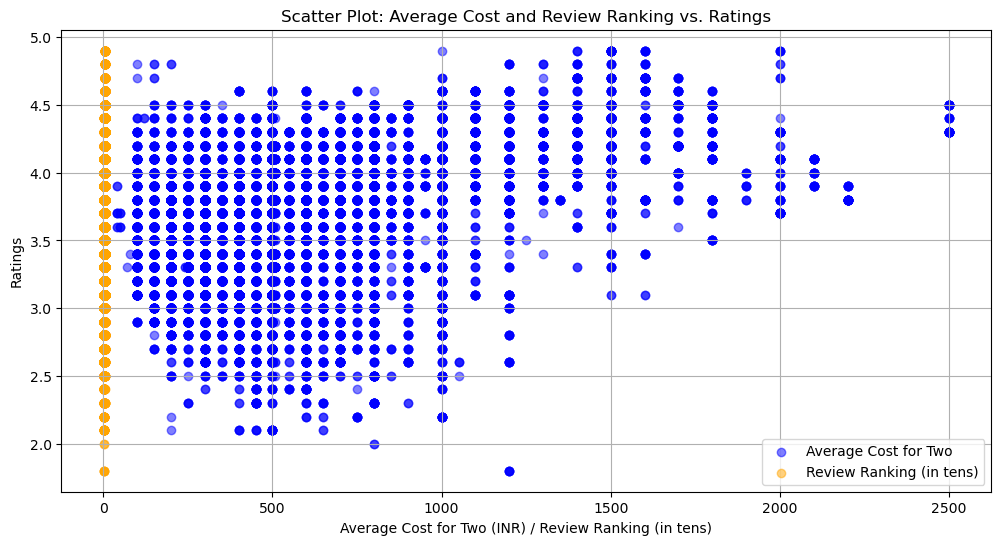

In [11]:
# Create a scatter plot to visualize the relationship between average cost and ratings
plt.figure(figsize=(12, 6))

# Scatter plot for average cost vs. ratings
plt.scatter(data['ave_cost_for_two'], data['rate'], alpha=0.5, label='Average Cost for Two', color='blue')

# Scatter plot for review ranking vs. ratings
plt.scatter(data['ave_review_ranking'], data['rate'], alpha=0.5, label='Review Ranking (in tens)', color='orange')

plt.xlabel('Average Cost for Two (INR) / Review Ranking (in tens)')
plt.ylabel('Ratings')
plt.title('Scatter Plot: Average Cost and Review Ranking vs. Ratings')
plt.legend()
plt.grid(True)
plt.show()


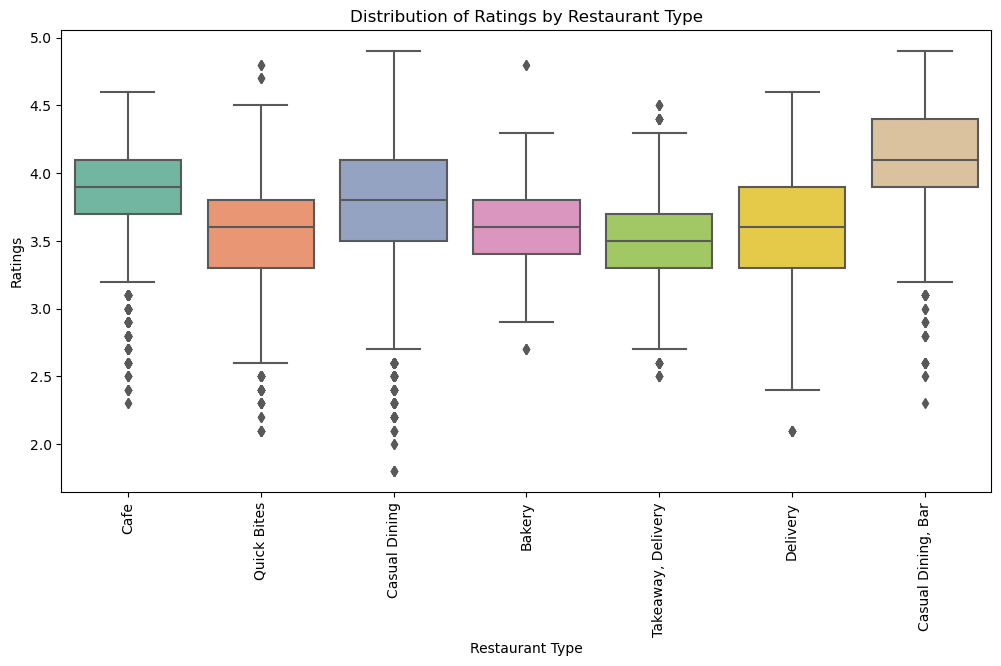

In [12]:
#Explore how ratings and average cost for two vary among restaurant types.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a box plot to explore how ratings vary among restaurant types
sns.boxplot(data=data, x='rest_type', y='rate', palette='Set2')
plt.xlabel('Restaurant Type')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings by Restaurant Type')
plt.xticks(rotation=90)

# Show the plot
plt.show()


Top 10 Highest-Rated Restaurants:
                                 name  rate
20805  Asia Kitchen By Mainland China   4.9
32224  Asia Kitchen By Mainland China   4.9
5578                         Flechazo   4.9
4693   Asia Kitchen By Mainland China   4.9
13649                    Punjab Grill   4.9
10791       AB's - Absolute Barbecues   4.9
20297       AB's - Absolute Barbecues   4.9
30192                        Flechazo   4.9
25068  Asia Kitchen By Mainland China   4.9
33190       AB's - Absolute Barbecues   4.9

Top 10 Lowest-Rated Restaurants:
                                   name  rate
36253  Alibi - Maya International Hotel   1.8
2342   Alibi - Maya International Hotel   1.8
15601  Alibi - Maya International Hotel   1.8
19663  Alibi - Maya International Hotel   1.8
5897   Alibi - Maya International Hotel   1.8
4890                            Bhagini   2.0
34136                           Bhagini   2.0
33342                     Mast Kalandar   2.1
18063                          Bag

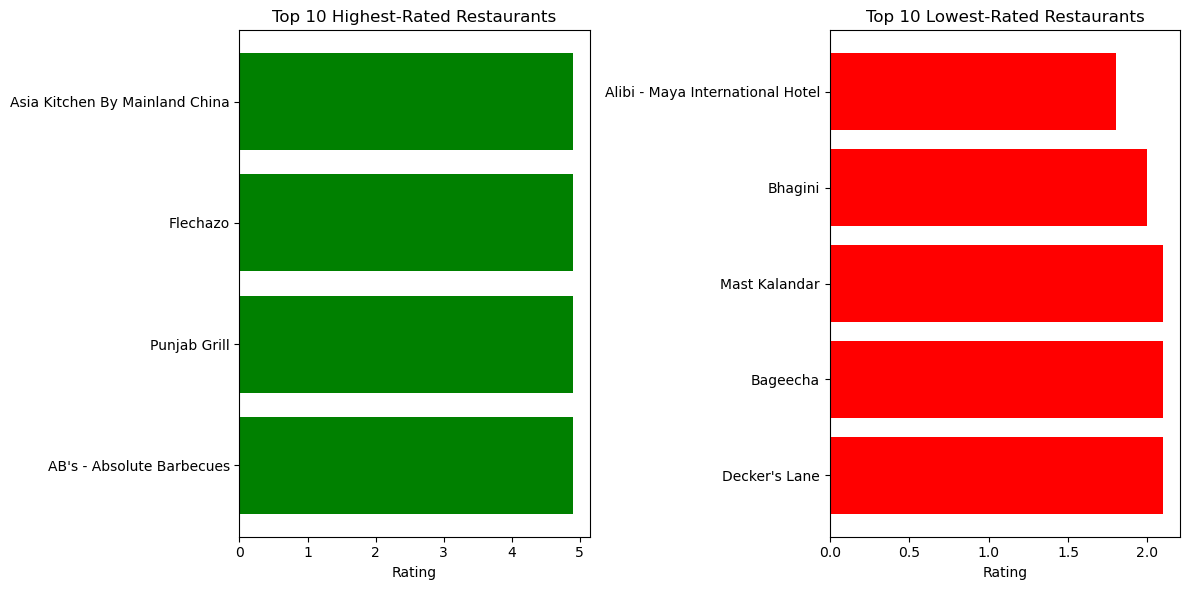

In [13]:
import matplotlib.pyplot as plt

# Sort the dataset by 'rate' column in descending order to find the top-rated and bottom-rated restaurants
top_rated_restaurants = data.sort_values(by='rate', ascending=False)
bottom_rated_restaurants = data.sort_values(by='rate', ascending=True)

# Display the top 10 highest-rated restaurants
print("Top 10 Highest-Rated Restaurants:")
print(top_rated_restaurants[['name', 'rate']].head(10))

# Display the top 10 lowest-rated restaurants
print("\nTop 10 Lowest-Rated Restaurants:")
print(bottom_rated_restaurants[['name', 'rate']].head(10))

# Create bar charts to visualize the top-rated and bottom-rated restaurants
plt.figure(figsize=(12, 6))

# Bar chart for top-rated restaurants
plt.subplot(1, 2, 1)
plt.barh(top_rated_restaurants['name'].head(10), top_rated_restaurants['rate'].head(10), color='green')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.xlabel('Rating')
plt.title('Top 10 Highest-Rated Restaurants')

# Bar chart for bottom-rated restaurants
plt.subplot(1, 2, 2)
plt.barh(bottom_rated_restaurants['name'].head(10), bottom_rated_restaurants['rate'].head(10), color='red')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest rating at the top
plt.xlabel('Rating')
plt.title('Top 10 Lowest-Rated Restaurants')

plt.tight_layout()
plt.show()


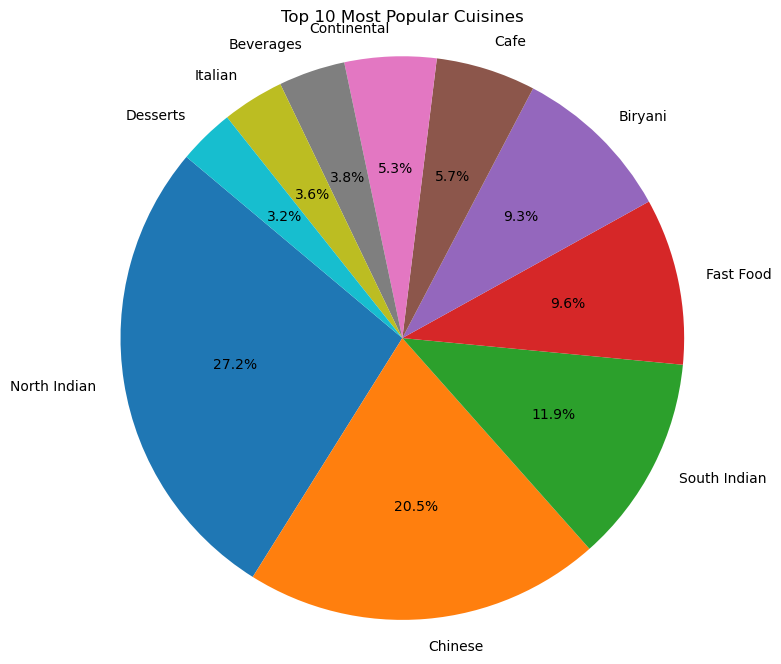

In [14]:
import matplotlib.pyplot as plt

# Split the 'cuisines' column to count the occurrence of each cuisine type
cuisine_counts = data['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Get the top 10 most popular cuisines
top_cuisines = cuisine_counts.head(10)

# Create a pie chart to visualize the distribution of the top 10 cuisines
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Cuisines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Graphic Representation

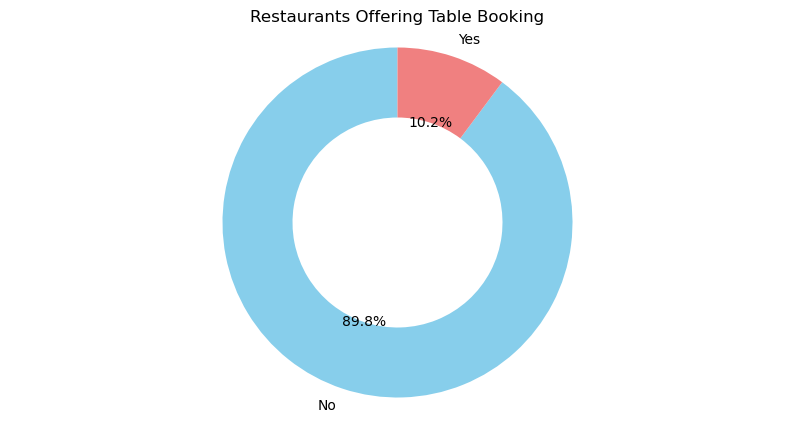

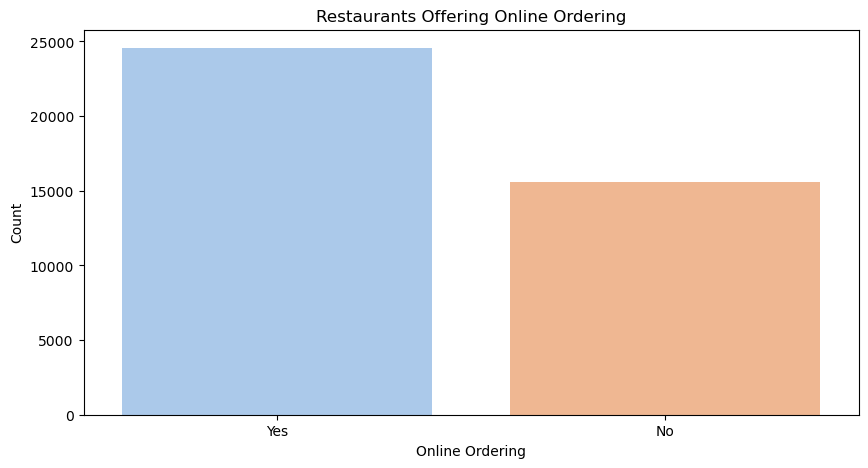

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Donut chart for table booking
plt.figure(figsize=(10, 5))
table_booking_counts = data['book_table'].value_counts()
labels = table_booking_counts.index
sizes = table_booking_counts.values
colors = ['skyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Restaurants Offering Table Booking')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular with a hole (donut chart).
plt.show()

# Stacked bar plot for online ordering
online_order_counts = data['online_order'].value_counts()
online_order_labels = online_order_counts.index
online_order_sizes = online_order_counts.values
sns.set_palette('pastel')
plt.figure(figsize=(10, 5))
sns.barplot(x=online_order_labels, y=online_order_sizes)
plt.title('Restaurants Offering Online Ordering')
plt.xlabel('Online Ordering')
plt.ylabel('Count')
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Create a 3D scatter plot for Average Cost, Ratings, and Review Ranking using Plotly
fig = px.scatter_3d(data, x='ave_cost_for_two', y='rate', z='ave_review_ranking', color='ave_review_ranking',
                    opacity=0.7, size_max=12)
fig.update_layout(scene=dict(xaxis_title='Average Cost for Two (INR)', yaxis_title='Ratings', zaxis_title='Review Ranking'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()


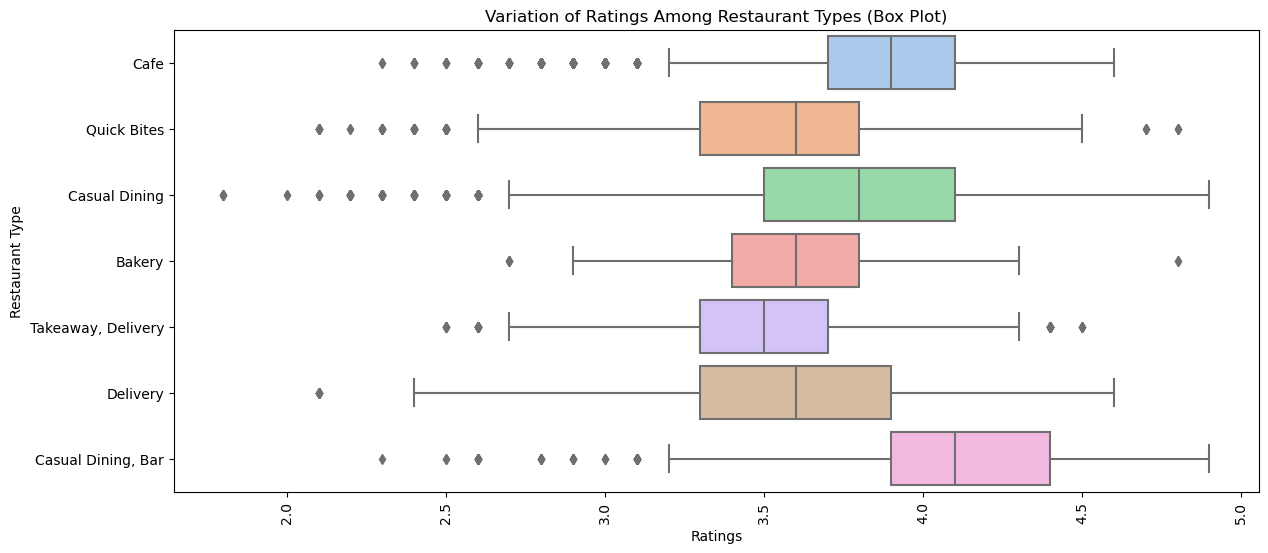

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(14, 6))

# Create a box plot to visualize the variation of ratings among different restaurant types
sns.boxplot(data=data, x='rate', y='rest_type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the labels for the x and y axes
plt.xlabel('Ratings')
plt.ylabel('Restaurant Type')

# Set the title of the plot
plt.title('Variation of Ratings Among Restaurant Types (Box Plot)')

# Display the plot
plt.show()


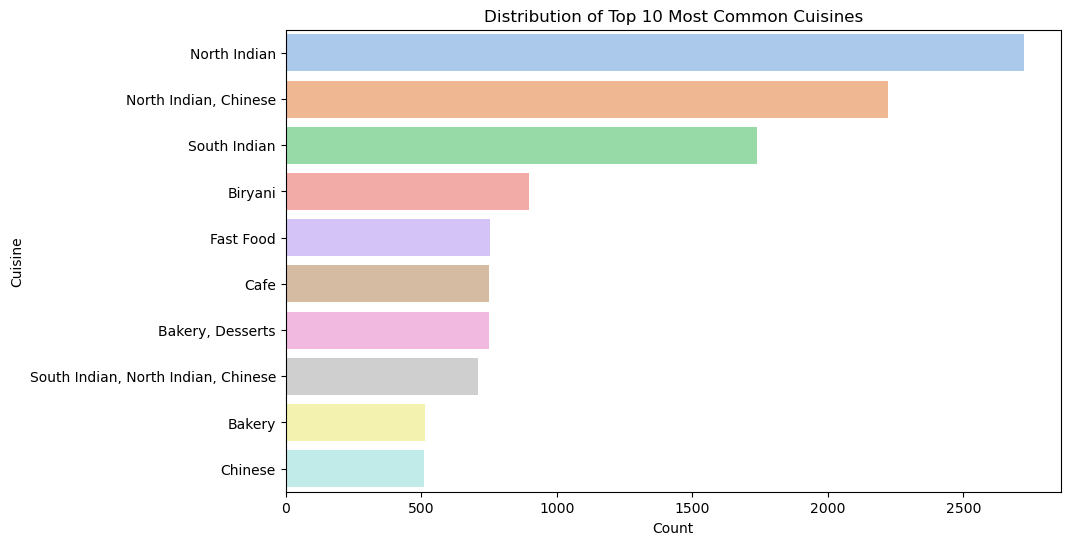

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 most common cuisines and their counts
top_cuisines = data['cuisines'].value_counts().head(10)

# Create a horizontal bar plot to visualize the distribution of the top cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='pastel')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Distribution of Top 10 Most Common Cuisines')
plt.show()


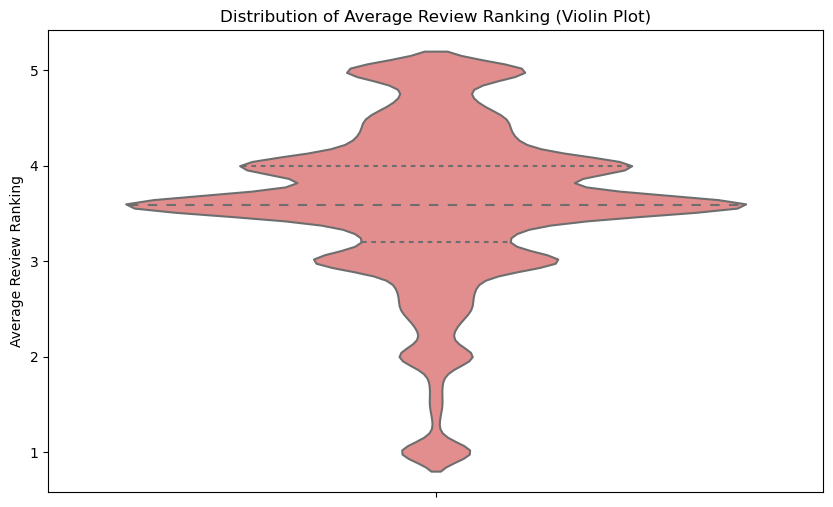

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot to visualize the distribution of average review ranking
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='ave_review_ranking', color='lightcoral', inner='quart')
plt.ylabel('Average Review Ranking')
plt.title('Distribution of Average Review Ranking (Violin Plot)')
plt.show()


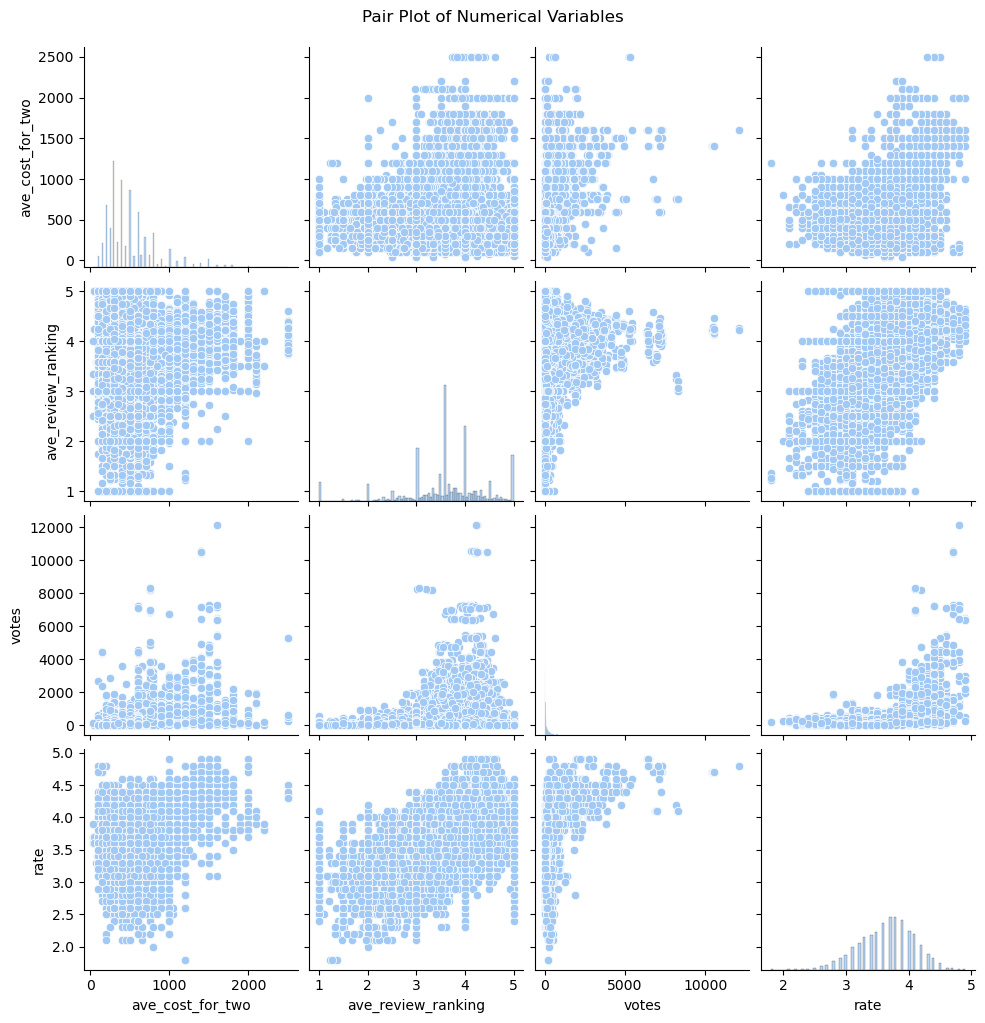

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical variables of interest
numerical_variables = data[['ave_cost_for_two', 'ave_review_ranking', 'votes', 'rate']]

# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(data=numerical_variables)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


# Machine Learning

In [29]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('FoodieBay.csv')

# Handle Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Remove rows with missing values
df.dropna(inplace=True)

#Removing duplicate entries
df.drop_duplicates(inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16870 entries, 3 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 16870 non-null  object 
 1   address             16870 non-null  object 
 2   name                16870 non-null  object 
 3   phone               16870 non-null  object 
 4   location            16870 non-null  object 
 5   rest_type           16870 non-null  object 
 6   cuisines            16870 non-null  object 
 7   menu_item           16870 non-null  object 
 8   listed_in_type      16870 non-null  object 
 9   listed_in_city      16870 non-null  object 
 10  online_order        16870 non-null  object 
 11  book_table          16870 non-null  object 
 12  ave_cost_for_two    16870 non-null  float64
 13  dish_liked          16870 non-null  object 
 14  votes               16870 non-null  int64  
 15  ave_review_ranking  16870 non-null  float64
 16  rate

In [31]:
df.describe().T

count        mean         std   min     25%         50%  \
ave_cost_for_two    16870.0  670.249555  374.729626  40.0  400.00  600.000000   
votes               16870.0  501.609781  840.039044   0.0  100.25  213.000000   
ave_review_ranking  16870.0    3.641957    0.702376   1.0    3.25    3.756394   
rate                16870.0    3.849514    0.433297   1.8    3.70    3.900000   

                           75%      max  
ave_cost_for_two    800.000000   2500.0  
votes               515.000000  12121.0  
ave_review_ranking    4.053977      5.0  
rate                  4.100000      4.9

In [33]:
#Remove irrelevant features from the dataframe to streamline model training
df = df.drop(['url','address','name','phone','location','cuisines','dish_liked','menu_item'], axis=1)

In [35]:
df.head(10)

rest_type listed_in_type         listed_in_city online_order  \
3        Casual Dining       Delivery           Brigade Road          Yes   
4                 Cafe       Dine-out           New BEL Road          Yes   
5                 Cafe          Cafes           Kammanahalli          Yes   
7          Quick Bites       Dine-out           Brigade Road          Yes   
8          Quick Bites       Delivery                    BTM          Yes   
12                Cafe          Cafes  Koramangala 4th Block          Yes   
14                Cafe          Cafes            Brookefield           No   
18  Casual Dining, Bar       Dine-out           Malleshwaram          Yes   
19       Casual Dining       Delivery              Bellandur          Yes   
21         Quick Bites       Delivery           Marathahalli          Yes   

   book_table  ave_cost_for_two  votes  ave_review_ranking  rate  
3         Yes            1200.0    550            4.800000   4.3  
4          No             250.0     67            3.000000   3.7  
5          No             650.0    140            3.500000   3.8  
7          No             250.0    204            3.497167   4.1  
8          No             300.0    127            1.854651   2.9  
12         No             700.0    778            4.000000   4.1  
14         No             700.0     90            3.954802   3.9  
18        Yes            1400.0   6433            4.164286   4.8  
19         No            1000.0    438            2.000000   2.4  
21         No             300.0    195            3.000000   3.9

In [37]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = df.drop(columns=['rate'])  # Features (excluding 'rate' which is the target variable)
y = df['rate']  # Target variable

# Encode categorical variables using one-hot encoding
categorical_columns = ['rest_type', 'listed_in_type', 'listed_in_city', 'online_order', 'book_table']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=42)

# Display the shapes of the train and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (14339, 46)
Shape of X_test: (2531, 46)
Shape of y_train: (14339,)
Shape of y_test: (2531,)


# Supervised Machine Learning

In [40]:
# Importing necessary regression models for selecting best two
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Added MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    BayesianRidge(),  
    MLPRegressor() 
    # Add more models here as needed
]

# Initializing lists to store model names and evaluation results
model_names = []
mse_scores = []
r2_scores = []

# Looping through each regression model
for model in models:
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the test set
    predictions = model.predict(X_test)

    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Appending model name and evaluation results to lists
    model_names.append(type(model).__name__)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Printing evaluation results for each model
for i in range(len(models)):
    print(f"Evaluation Results for {model_names[i]}:")
    print(f"Mean Squared Error: {mse_scores[i]:.2f}")
    print(f"R-squared (R2) Score: {r2_scores[i]:.2f}")
    print()


Evaluation Results for LinearRegression:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.48

Evaluation Results for Ridge:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.48

Evaluation Results for Lasso:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

Evaluation Results for ElasticNet:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

Evaluation Results for DecisionTreeRegressor:
Mean Squared Error: 0.05
R-squared (R2) Score: 0.75

Evaluation Results for RandomForestRegressor:
Mean Squared Error: 0.03
R-squared (R2) Score: 0.86

Evaluation Results for GradientBoostingRegressor:
Mean Squared Error: 0.08
R-squared (R2) Score: 0.57

Evaluation Results for SVR:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.21

Evaluation Results for KNeighborsRegressor:
Mean Squared Error: 0.06
R-squared (R2) Score: 0.69

Evaluation Results for BayesianRidge:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.48

Evaluation Results for MLPRegressor:
Mean Squared Error: 0.14
R-squared (R2) Score

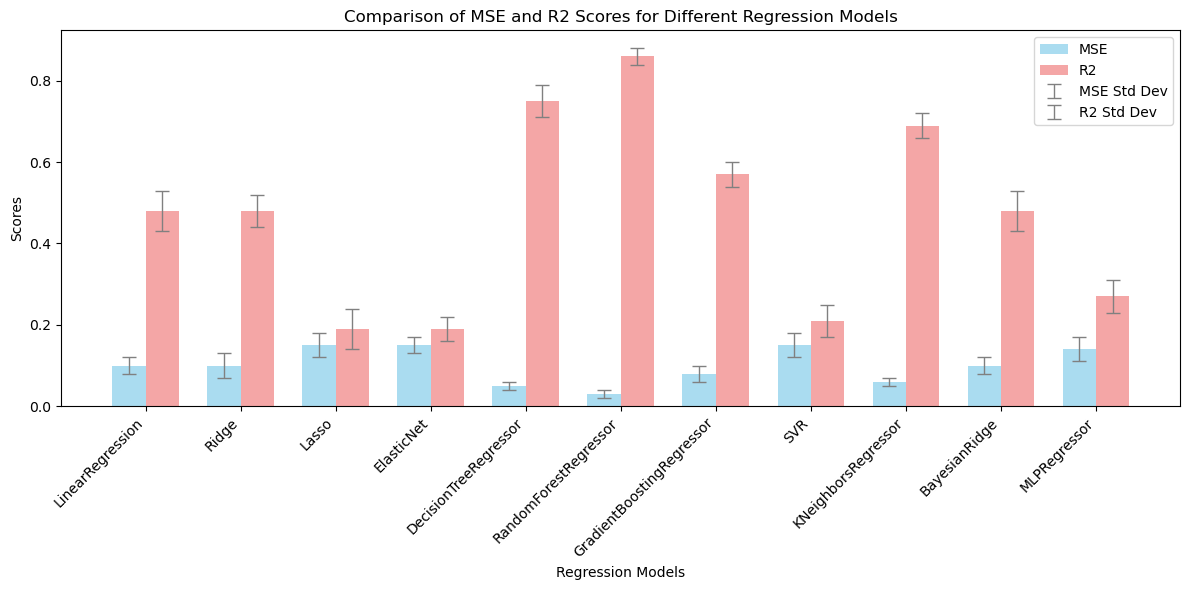

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation results
model_names = [
    'LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor',
    'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'KNeighborsRegressor',
    'BayesianRidge', 'MLPRegressor'
]
mse_scores = [0.10, 0.10, 0.15, 0.15, 0.05, 0.03, 0.08, 0.15, 0.06, 0.10, 0.14]
r2_scores = [0.48, 0.48, 0.19, 0.19, 0.75, 0.86, 0.57, 0.21, 0.69, 0.48, 0.27]

# Number of models
num_models = len(model_names)

# Set bar width
bar_width = 0.35

# Set positions for bars on x-axis
index = np.arange(num_models)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for MSE
bar1 = ax.bar(index, mse_scores, bar_width, label='MSE', color='skyblue', alpha=0.7)

# Bar plot for R2 scores
bar2 = ax.bar(index + bar_width, r2_scores, bar_width, label='R2', color='lightcoral', alpha=0.7)

# Set x-axis labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Regression Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MSE and R2 Scores for Different Regression Models')

# Add error bars (standard deviation)
mse_std = [0.02, 0.03, 0.03, 0.02, 0.01, 0.01, 0.02, 0.03, 0.01, 0.02, 0.03]
r2_std = [0.05, 0.04, 0.05, 0.03, 0.04, 0.02, 0.03, 0.04, 0.03, 0.05, 0.04]
ax.errorbar(index, mse_scores, yerr=mse_std, fmt='none', elinewidth=1, capsize=5, capthick=1, color='gray', label='MSE Std Dev')
ax.errorbar(index + bar_width, r2_scores, yerr=r2_std, fmt='none', elinewidth=1, capsize=5, capthick=1, color='gray', label='R2 Std Dev')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the top-performing models
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
bayesian_ridge_model = BayesianRidge()

# Train the Gradient Boosting Regressor
gradient_boosting_model.fit(X_train, y_train)
gb_predictions = gradient_boosting_model.predict(X_test)

# Train the Bayesian Ridge Regressor
bayesian_ridge_model.fit(X_train, y_train)
br_predictions = bayesian_ridge_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Evaluate the Bayesian Ridge Regressor
br_mse = mean_squared_error(y_test, br_predictions)
br_r2 = r2_score(y_test, br_predictions)

# Print evaluation results for the two selected models
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared (R2) Score: {gb_r2:.2f}")
print()

print("Bayesian Ridge Regressor Results:")
print(f"Mean Squared Error: {br_mse:.2f}")
print(f"R-squared (R2) Score: {br_r2:.2f}")


Gradient Boosting Regressor Results:
Mean Squared Error: 0.08
R-squared (R2) Score: 0.57

Bayesian Ridge Regressor Results:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.48


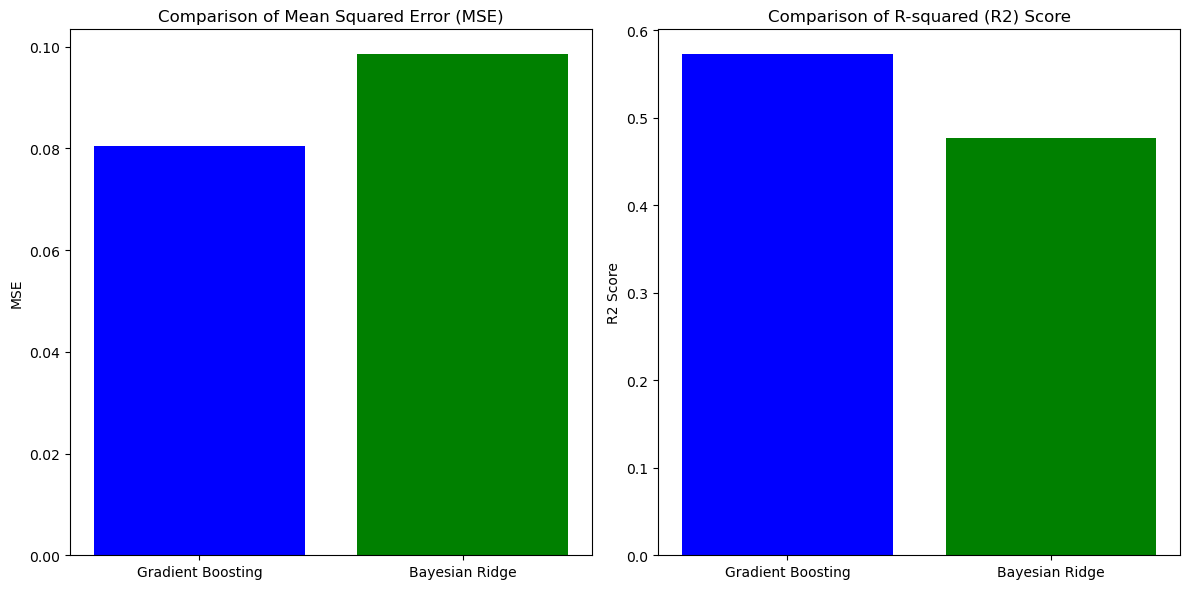

In [44]:
import matplotlib.pyplot as plt

# Evaluation metrics and model names
metrics = ['Mean Squared Error (MSE)', 'R-squared (R2) Score']
model_names = ['Gradient Boosting', 'Bayesian Ridge']
mse_scores = [gb_mse, br_mse]
r2_scores = [gb_r2, br_r2]

# Create subplots for MSE and R2
plt.figure(figsize=(12, 6))

# Subplot for Mean Squared Error
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_scores, color=['blue', 'green'])
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Subplot for R-squared (R2) Score
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color=['blue', 'green'])
plt.title('Comparison of R-squared (R2) Score')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


# Advantages and disadvantages of each model

Here are the pros and cons of the Gradient Boosting Regressor and Bayesian Ridge Regressor models based on their performance:

Gradient Boosting Regressor:

Pros:
1. High Predictive Accuracy: Gradient Boosting is an ensemble technique known for its high predictive accuracy. It can capture complex relationships in the data and provides accurate predictions.
2. Handles Non-Linearity: Gradient Boosting can effectively handle non-linear relationships between features and the target variable.
3. Robust to Outliers: It is relatively robust to outliers and noisy data, thanks to its ensemble nature.
4. Feature Importance: It provides a measure of feature importance, which can help identify the most influential features in the model.

Cons:
1. Complexity: Gradient Boosting models can be computationally expensive and may require tuning of hyperparameters to prevent overfitting.
2. Overfitting: If not properly tuned, Gradient Boosting models can overfit the training data.
3. Longer Training Time: Training a Gradient Boosting model can take more time compared to simpler models due to the ensemble nature.

Bayesian Ridge Regressor:

Pros:
1. Bayesian Framework: Bayesian Ridge Regression is based on a Bayesian framework, which provides a principled way to handle uncertainty in model parameters.
2. Regularization: It includes automatic regularization of model parameters, which helps prevent overfitting.
3. Handles Multicollinearity: It can handle multicollinearity (high correlation between features) well by estimating the relationships between features and the target.
4. Fast Training: Bayesian Ridge models are relatively fast to train and can work well with large datasets.

Cons:
1. Simplistic: Bayesian Ridge Regression may not capture complex relationships as effectively as ensemble methods like Gradient Boosting.
2. Limited Feature Importance: It may not provide feature importance scores, making it less suitable for feature selection.
3. Assumes Linearity: It assumes that the relationships between features and the target variable are linear, which may not be suitable for highly non-linear data.

Gradient Boosting is generally a good choice when high predictive accuracy is essential, while Bayesian Ridge can be a robust and computationally efficient option for simpler linear relationships.

# Unsupervised Machine Learning

C:\Users\asif.ayub\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asif.ayub\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asif.ayub\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asif.ayub\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\asif.ayub\AppData\Local\anaconda3\l

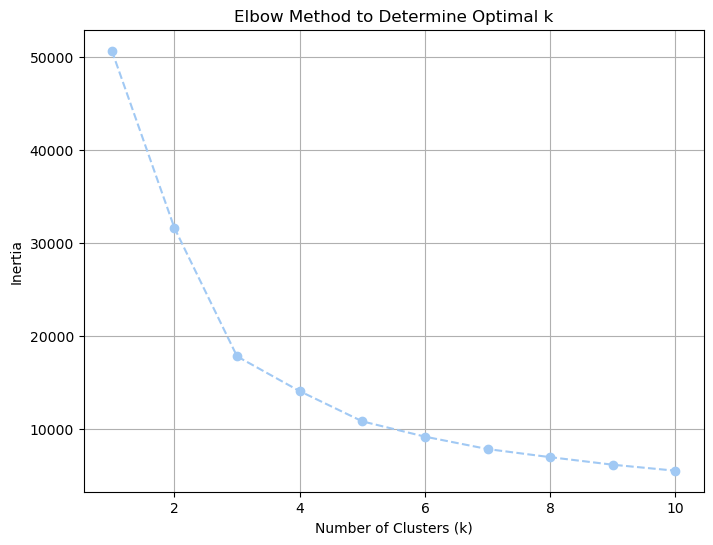

C:\Users\asif.ayub\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

# Choose the features you intend to use for clustering (e.g., numerical attributes)
selected_features = ['ave_cost_for_two', 'votes', 'ave_review_ranking','rate']

# Extract the selected features from the dataset
X = df[selected_features]

# Standardize the features (essential for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction (optional but can be beneficial)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a list to store the inertia (within-cluster sum of squares) values
inertia = []

# Experiment with different values of k (number of clusters) and calculate inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Alternatively, you can use X_scaled instead of X_pca
    inertia.append(kmeans.inertia_)

# Visualize the Elbow Method graph to identify the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Method graph, select the optimal number of clusters (k)
# In this case, let's assume k=3 as the optimal number of clusters

# Perform K-means clustering with the chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)  # Alternatively, you can use X_scaled instead of X_pca

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Now, the df DataFrame includes cluster labels for each data point


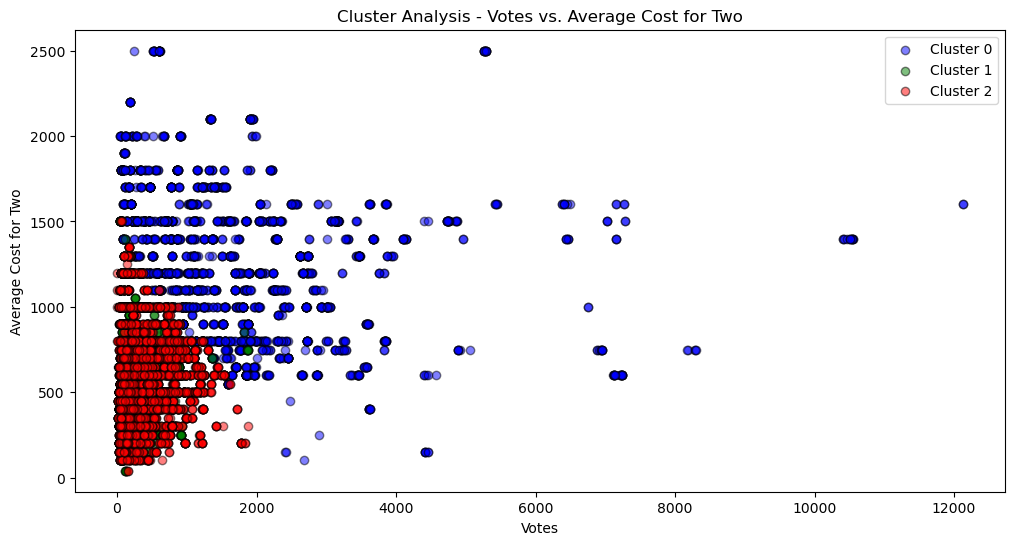

In [46]:
# Create a scatter plot to visualize the clusters in 2D
plt.figure(figsize=(12, 6))
colors = ['b', 'g', 'r']  # Define colors for clusters
for cluster_label in df['cluster'].unique():
    plt.scatter(df[df['cluster'] == cluster_label]['votes'],
                df[df['cluster'] == cluster_label]['ave_cost_for_two'],
                label=f'Cluster {cluster_label}',
                c=colors[cluster_label], alpha=0.5, edgecolors='k')
plt.title('Cluster Analysis - Votes vs. Average Cost for Two')
plt.xlabel('Votes')
plt.ylabel('Average Cost for Two')
plt.legend()
plt.show()


C:\Users\asif.ayub\AppData\Local\Temp\ipykernel_6904\517479670.py:5: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



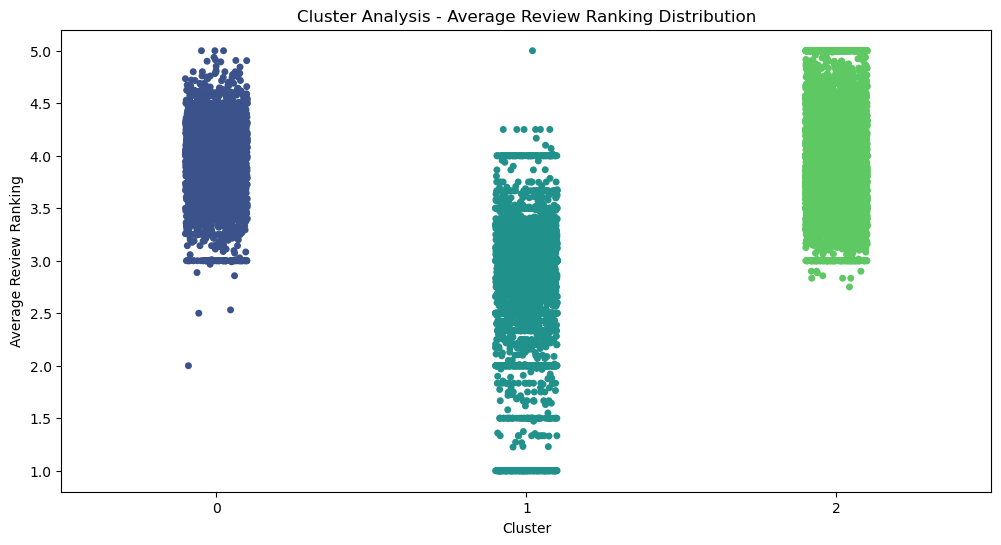

In [49]:
# Create a strip plot for the distribution of 'ave_review_ranking' across clusters
plt.figure(figsize=(12, 6))

# Use stripplot for better visualization of overlapping points
sns.stripplot(data=df, x='cluster', y='ave_review_ranking', palette='viridis', jitter=True, size=5)

# Set plot title and axis labels
plt.title('Cluster Analysis - Average Review Ranking Distribution')
plt.xlabel('Cluster')
plt.ylabel('Average Review Ranking')

# Display the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

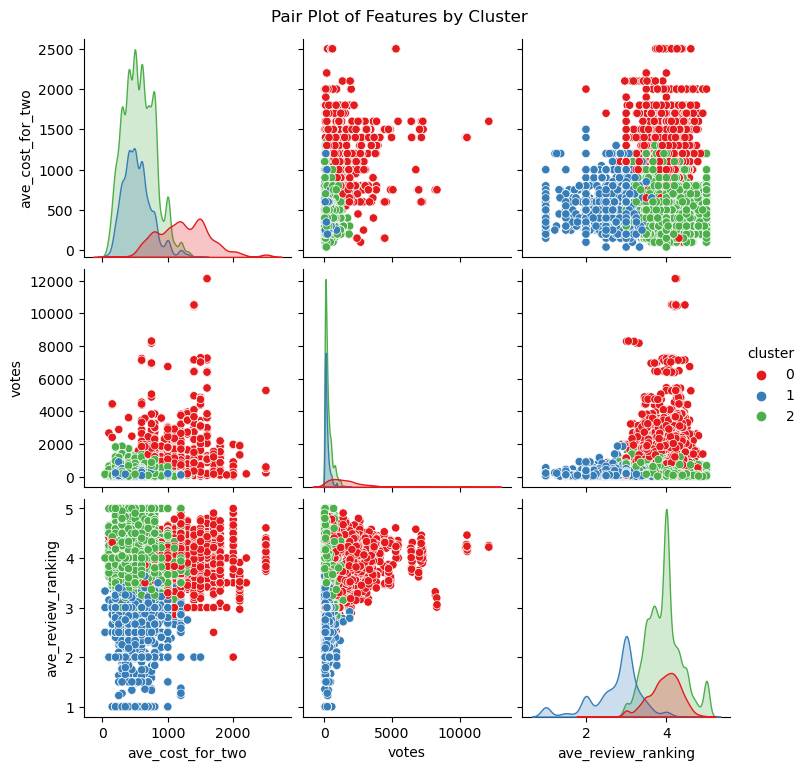

In [50]:
# Create a pair plot to visualize relationships between features by cluster
plt.figure(figsize=(12, 6))

# Use 'hue' to color data points by cluster
# 'palette' parameter sets the color scheme
sns.pairplot(data=df, hue='cluster', vars=['ave_cost_for_two', 'votes', 'ave_review_ranking'], palette='Set1')

# Set the title and adjust the position for better visibility
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)

# Display the plot
plt.show()


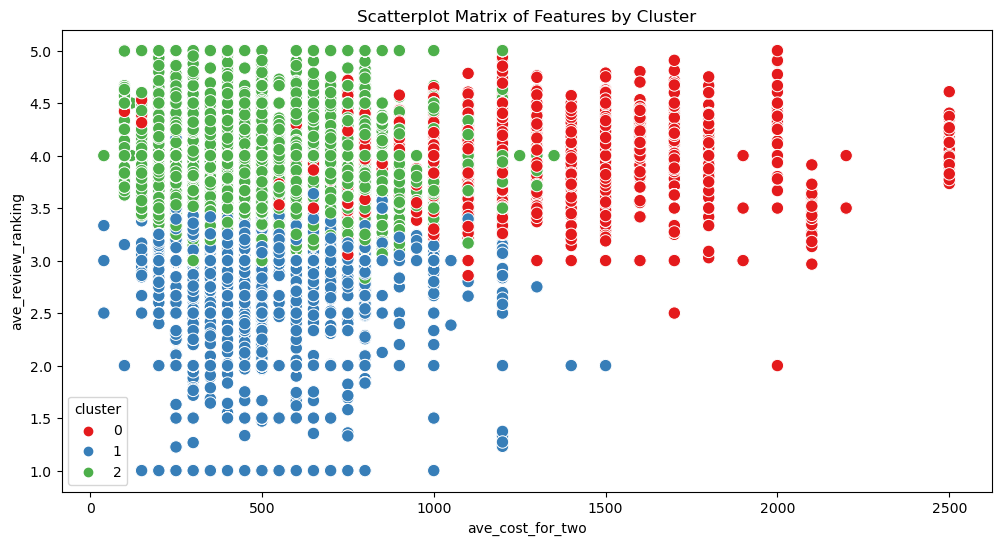

In [51]:
# Create a scatterplot matrix to visualize relationships between features by cluster
plt.figure(figsize=(12, 6))

# Use 'hue' to color data points by cluster
# 'palette' parameter sets the color scheme
sns.scatterplot(data=df, x='ave_cost_for_two', y='ave_review_ranking', hue='cluster', palette='Set1', s=80)

# Set the title
plt.title('Scatterplot Matrix of Features by Cluster')

# Display the plot
plt.show()
